# Iris 데이터 예제를 통한 ROC AUC 구하기

  ## 1. 라이브러리 불러오기

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [8]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from scipy import interp

In [10]:
#데이터를 불러온다.
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [11]:
#타겟 변수를 이진화 시킨다.
y=label_binarize(y, classes=[0,1,2])
n_classes=y.shape[1]

In [12]:
#노이즈를 더해 훈련 강도를 높인다.
random_state=np.random.RandomState(523)
n_samples, n_features=x.shape
x=np.c_[x, random_state.randn(n_samples, 200*n_features)]

In [13]:
#훈련과 테스로 데이터를 나눈다.
train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=.3, random_state=523)
#스케일 시켜준다.
scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [24]:
#모델을 훈련시킨다.
classifier=OneVsRestClassifier(RandomForestClassifier(n_estimators=2011, criterion='entropy', random_state=523))
classifier.fit(train_x, train_y)
score_y=classifier.fit(train_x, train_y).predict_proba(test_x)

In [25]:
# ROC 곡선과 ROC 영역을 산출한다.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], score_y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [27]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), score_y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

특정 클래스의 ROC 곡선을 보여준다.

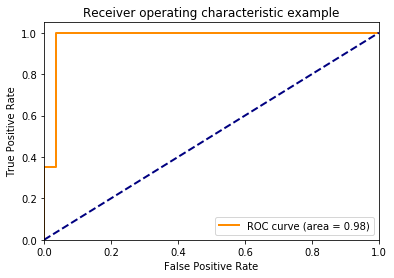

In [28]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

여러 클래스의 ROC 곡선을 보여준다.

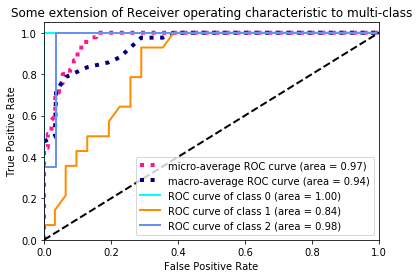

In [29]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()